# Top GitHub Repositories By Topic

## Introduction

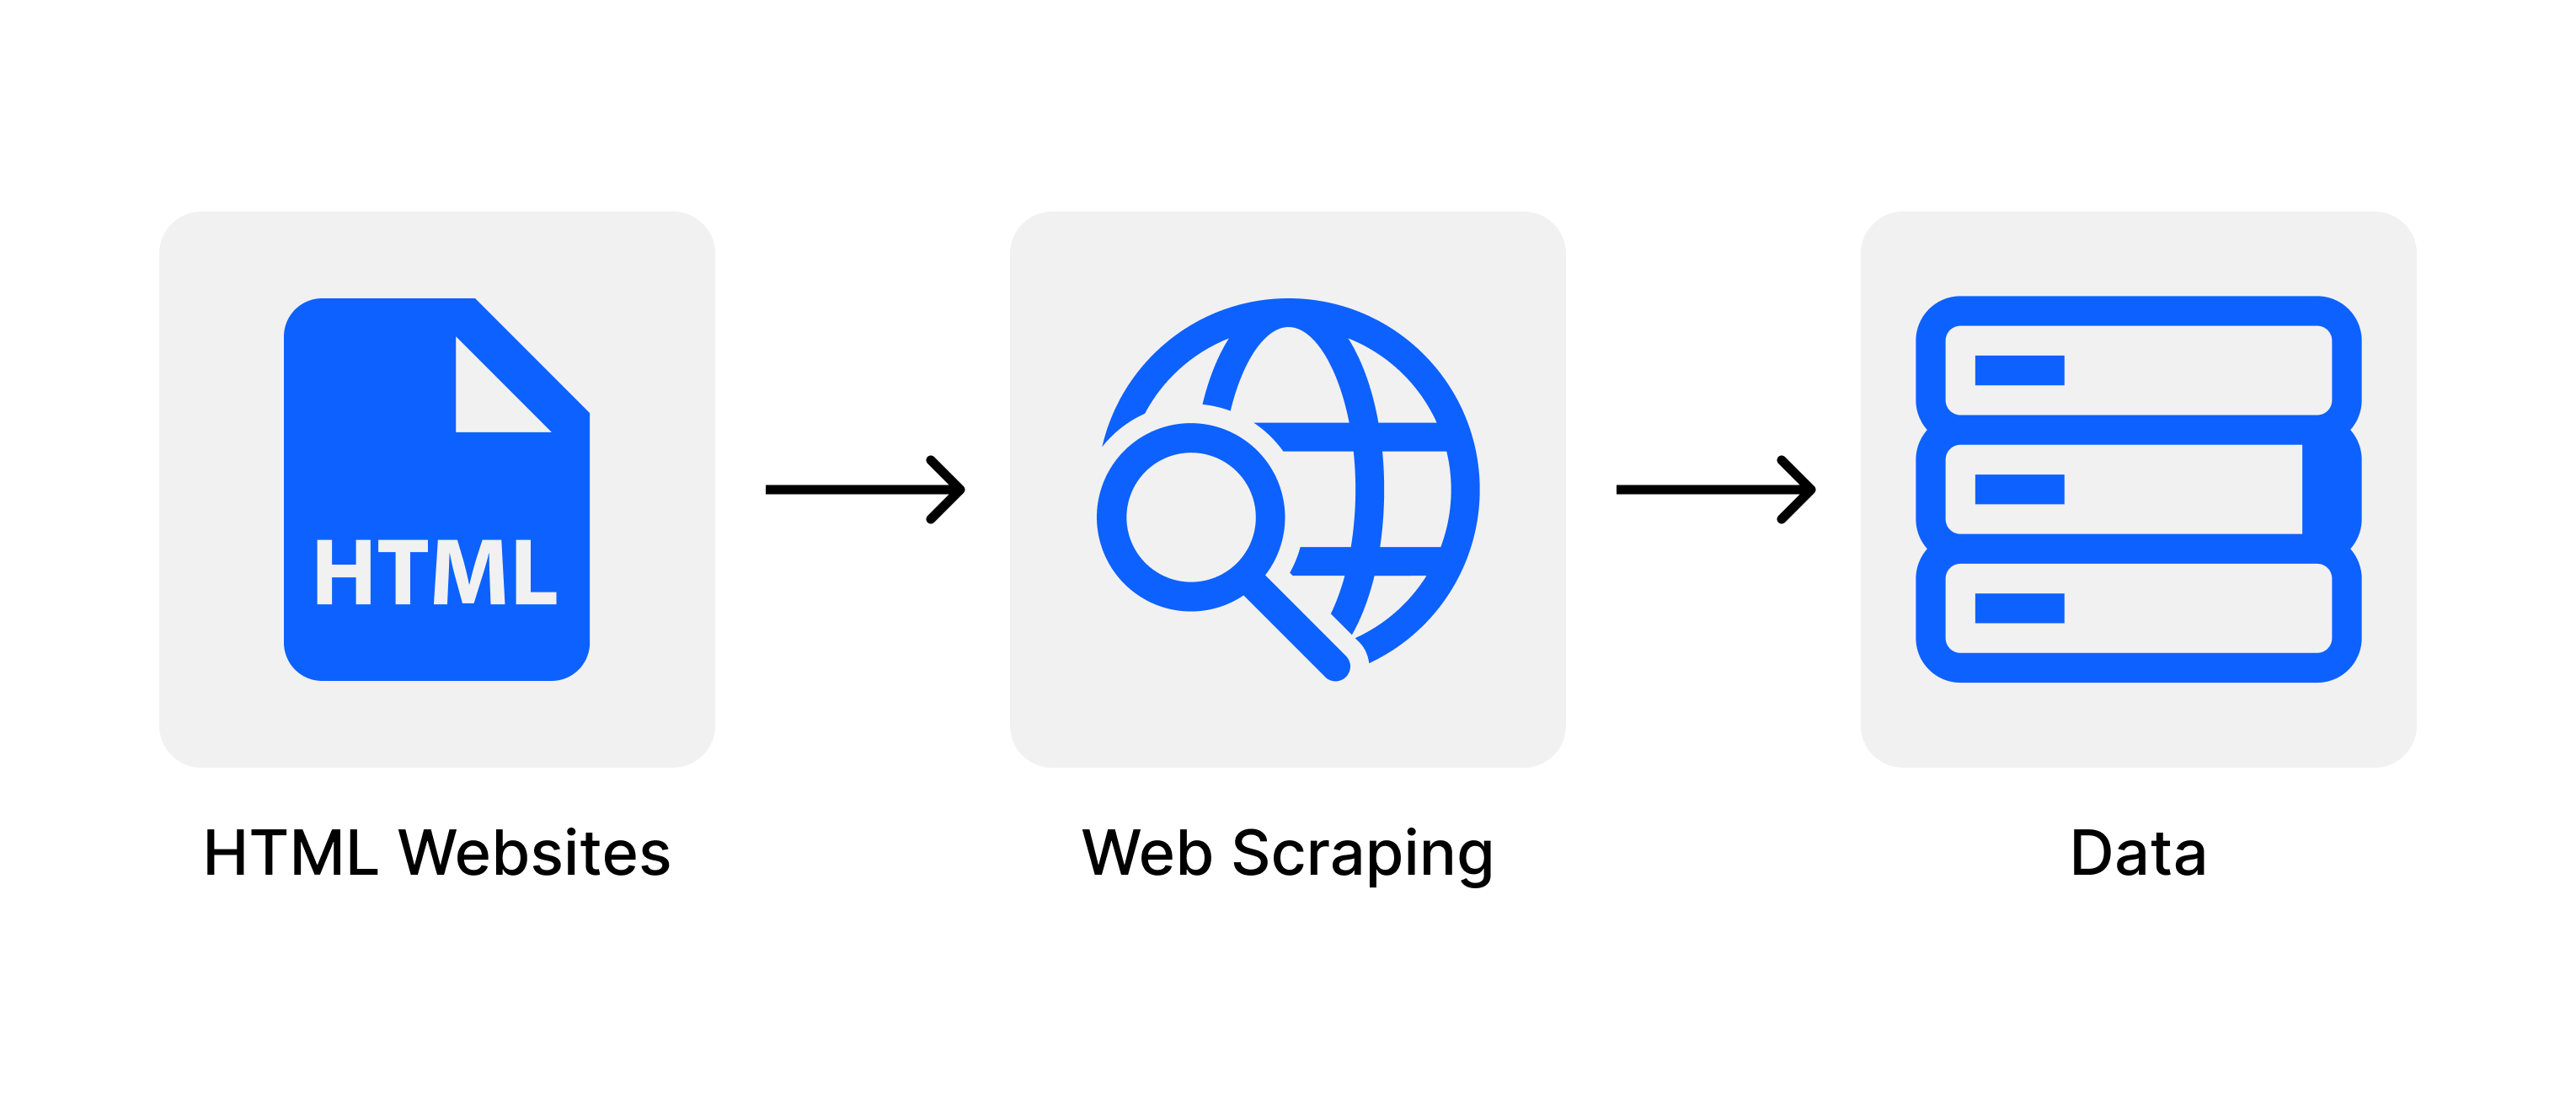

__Web Scraping__ is the process of extracting and parsing data from websites in an automated manner using a computer program. It's a useful technique for creating datasets. Some of the main use cases of web scraping include price monitoring, price intelligence, news monitoring, lead generation, and market research among many others. In this project, we'll build a web scraping project from scratch using Python and its ecosystem of libraries.

Following are the steps on how to extract the information:
1. Load the libraries needed for the project
2. Download the page using requests
3. Parse the html source code using BeautifulSoup4
4. Extract the information and the data that we are trying to about the movies
5. Extract and combine data from multiple pages from the portal
6. Compile extracted information into python data objects
7. Finally, write and save the info into CSV files

## Project Outline:
- In this project, I'll scrape https://github.com/topics
- We'll get a list of topics. For each topic, we'll grab the topic title, topic URL and the topic description.
- The top 25 repositories for each topic page will be included.
- The repository name, username, stars and URL of each repository will be retrieved.
- I'll save the extracted information in a CSV file.


## Use the Requests Library to Download Web Pages

In [2]:
import requests

In [3]:
topics_url = 'https://github.com/topics'

In [4]:
response = requests.get(topics_url)

In [5]:
response.status_code

200

In [7]:
len(response.text)

138638

In [6]:
response.text

'\n\n<!DOCTYPE html>\n<html lang="en" data-color-mode="auto" data-light-theme="light" data-dark-theme="dark" >\n  <head>\n    <meta charset="utf-8">\n  <link rel="dns-prefetch" href="https://github.githubassets.com">\n  <link rel="dns-prefetch" href="https://avatars.githubusercontent.com">\n  <link rel="dns-prefetch" href="https://github-cloud.s3.amazonaws.com">\n  <link rel="dns-prefetch" href="https://user-images.githubusercontent.com/">\n  <link rel="preconnect" href="https://github.githubassets.com" crossorigin>\n  <link rel="preconnect" href="https://avatars.githubusercontent.com">\n\n\n\n  <link crossorigin="anonymous" media="all" integrity="sha512-sD8zc/Dn1lguLc4FdbeVhD2gfxFCTXGr/y+MpJG3oX1vkAyaFf/7BHPtvv1dAHA0KG4bDEW3Ex1EPrzGTMtN2Q==" rel="stylesheet" href="https://github.githubassets.com/assets/light-b03f3373f0e7.css" /><link crossorigin="anonymous" media="all" integrity="sha512-V0872pNNqPTaPQFzdwX9tHIzJvB4F1Foi6VYDciZAMo/qHgBC8PvN2d/SkMweiNDbR6eF3cXcG0aPVrEtC8zqw==" rel="styl

In [8]:
page_contents = response.text

In [9]:
with open('/Users/ahmedahmed/Desktop/webpage.html', 'w') as f:
    f.write(page_contents)

## Use Beautiful Soup to Parse and Extract Information

In [10]:
from bs4 import BeautifulSoup

In [11]:
doc = BeautifulSoup(page_contents, 'html.parser')

In [12]:
doc


<!DOCTYPE html>

<html data-color-mode="auto" data-dark-theme="dark" data-light-theme="light" lang="en">
<head>
<meta charset="utf-8"/>
<link href="https://github.githubassets.com" rel="dns-prefetch"/>
<link href="https://avatars.githubusercontent.com" rel="dns-prefetch"/>
<link href="https://github-cloud.s3.amazonaws.com" rel="dns-prefetch"/>
<link href="https://user-images.githubusercontent.com/" rel="dns-prefetch"/>
<link crossorigin="" href="https://github.githubassets.com" rel="preconnect"/>
<link href="https://avatars.githubusercontent.com" rel="preconnect"/>
<link crossorigin="anonymous" href="https://github.githubassets.com/assets/light-b03f3373f0e7.css" integrity="sha512-sD8zc/Dn1lguLc4FdbeVhD2gfxFCTXGr/y+MpJG3oX1vkAyaFf/7BHPtvv1dAHA0KG4bDEW3Ex1EPrzGTMtN2Q==" media="all" rel="stylesheet"><link crossorigin="anonymous" href="https://github.githubassets.com/assets/dark-574f3bda934d.css" integrity="sha512-V0872pNNqPTaPQFzdwX9tHIzJvB4F1Foi6VYDciZAMo/qHgBC8PvN2d/SkMweiNDbR6eF3cXcG0

In [13]:
type(doc)

bs4.BeautifulSoup

In [14]:
p_tags = doc.find_all('p')

In [15]:
len(p_tags)

67

In [16]:
p_tags

[<p class="f4 color-fg-muted col-md-6 mx-auto">Browse popular topics on GitHub.</p>,
 <p class="f3 lh-condensed text-center Link--primary mb-0 mt-1">
         Node.js
       </p>,
 <p class="f5 color-fg-muted text-center mb-0 mt-1">Node.js is a tool for executing JavaScript in a variety of environments.</p>,
 <p class="f3 lh-condensed text-center Link--primary mb-0 mt-1">
         Vue.js
       </p>,
 <p class="f5 color-fg-muted text-center mb-0 mt-1">Vue.js is a JavaScript framework for building interactive web applications.</p>,
 <p class="f3 lh-condensed text-center Link--primary mb-0 mt-1">
         WordPlate
       </p>,
 <p class="f5 color-fg-muted text-center mb-0 mt-1">WordPlate is a modern WordPress stack which simplifies WordPress development.</p>,
 <p class="f3 lh-condensed mb-0 mt-1 Link--primary">3D</p>,
 <p class="f5 color-fg-muted mb-0 mt-1">
           3D modeling is the process of virtually developing the surface and structure of a 3D object.
         </p>,
 <p class="

In [20]:
# Let's modify our tag as our p tag included unwanted tags

topic_title_tags = doc.find_all('p', {'class':'f3 lh-condensed mb-0 mt-1 Link--primary'})

In [21]:
len(topic_title_tags)

30

In [22]:
topic_title_tags

[<p class="f3 lh-condensed mb-0 mt-1 Link--primary">3D</p>,
 <p class="f3 lh-condensed mb-0 mt-1 Link--primary">Ajax</p>,
 <p class="f3 lh-condensed mb-0 mt-1 Link--primary">Algorithm</p>,
 <p class="f3 lh-condensed mb-0 mt-1 Link--primary">Amp</p>,
 <p class="f3 lh-condensed mb-0 mt-1 Link--primary">Android</p>,
 <p class="f3 lh-condensed mb-0 mt-1 Link--primary">Angular</p>,
 <p class="f3 lh-condensed mb-0 mt-1 Link--primary">Ansible</p>,
 <p class="f3 lh-condensed mb-0 mt-1 Link--primary">API</p>,
 <p class="f3 lh-condensed mb-0 mt-1 Link--primary">Arduino</p>,
 <p class="f3 lh-condensed mb-0 mt-1 Link--primary">ASP.NET</p>,
 <p class="f3 lh-condensed mb-0 mt-1 Link--primary">Atom</p>,
 <p class="f3 lh-condensed mb-0 mt-1 Link--primary">Awesome Lists</p>,
 <p class="f3 lh-condensed mb-0 mt-1 Link--primary">Amazon Web Services</p>,
 <p class="f3 lh-condensed mb-0 mt-1 Link--primary">Azure</p>,
 <p class="f3 lh-condensed mb-0 mt-1 Link--primary">Babel</p>,
 <p class="f3 lh-condensed m

In [23]:
topic_desc_tags = doc.find_all('p', {'class':"f5 color-fg-muted mb-0 mt-1"})

In [35]:
topic_desc_tags

[<p class="f5 color-fg-muted mb-0 mt-1">
           3D modeling is the process of virtually developing the surface and structure of a 3D object.
         </p>,
 <p class="f5 color-fg-muted mb-0 mt-1">
           Ajax is a technique for creating interactive web applications.
         </p>,
 <p class="f5 color-fg-muted mb-0 mt-1">
           Algorithms are self-contained sequences that carry out a variety of tasks.
         </p>,
 <p class="f5 color-fg-muted mb-0 mt-1">
           Amp is a non-blocking concurrency library for PHP.
         </p>,
 <p class="f5 color-fg-muted mb-0 mt-1">
           Android is an operating system built by Google designed for mobile devices.
         </p>,
 <p class="f5 color-fg-muted mb-0 mt-1">
           Angular is an open source web application platform.
         </p>,
 <p class="f5 color-fg-muted mb-0 mt-1">
           Ansible is a simple and powerful automation engine.
         </p>,
 <p class="f5 color-fg-muted mb-0 mt-1">
           An API (Applicati

In [25]:
topic_link_tags = doc.find_all('a', {'class':"no-underline flex-1 d-flex flex-column"})

In [26]:
len(topic_link_tags)

30

In [27]:
topic_link_tags

[<a class="no-underline flex-1 d-flex flex-column" href="/topics/3d">
 <p class="f3 lh-condensed mb-0 mt-1 Link--primary">3D</p>
 <p class="f5 color-fg-muted mb-0 mt-1">
           3D modeling is the process of virtually developing the surface and structure of a 3D object.
         </p>
 </a>,
 <a class="no-underline flex-1 d-flex flex-column" href="/topics/ajax">
 <p class="f3 lh-condensed mb-0 mt-1 Link--primary">Ajax</p>
 <p class="f5 color-fg-muted mb-0 mt-1">
           Ajax is a technique for creating interactive web applications.
         </p>
 </a>,
 <a class="no-underline flex-1 d-flex flex-column" href="/topics/algorithm">
 <p class="f3 lh-condensed mb-0 mt-1 Link--primary">Algorithm</p>
 <p class="f5 color-fg-muted mb-0 mt-1">
           Algorithms are self-contained sequences that carry out a variety of tasks.
         </p>
 </a>,
 <a class="no-underline flex-1 d-flex flex-column" href="/topics/amphp">
 <p class="f3 lh-condensed mb-0 mt-1 Link--primary">Amp</p>
 <p class="f

In [28]:
topic_link_tags[0]['href']

'/topics/3d'

In [31]:
topic0_url = 'https://github.com' + topic_link_tags[0]['href']
print(topic0_url)

https://github.com/topics/3d


In [32]:
topic_titles = []

for tag in topic_title_tags:
    topic_titles.append(tag.text)
    
print(topic_titles)

['3D', 'Ajax', 'Algorithm', 'Amp', 'Android', 'Angular', 'Ansible', 'API', 'Arduino', 'ASP.NET', 'Atom', 'Awesome Lists', 'Amazon Web Services', 'Azure', 'Babel', 'Bash', 'Bitcoin', 'Bootstrap', 'Bot', 'C', 'Chrome', 'Chrome extension', 'Command line interface', 'Clojure', 'Code quality', 'Code review', 'Compiler', 'Continuous integration', 'COVID-19', 'C++']


In [41]:
topic_descriptions = []

for tag in topic_desc_tags:
    topic_descriptions.append(tag.text.strip())
    
print(topic_descriptions)

['3D modeling is the process of virtually developing the surface and structure of a 3D object.', 'Ajax is a technique for creating interactive web applications.', 'Algorithms are self-contained sequences that carry out a variety of tasks.', 'Amp is a non-blocking concurrency library for PHP.', 'Android is an operating system built by Google designed for mobile devices.', 'Angular is an open source web application platform.', 'Ansible is a simple and powerful automation engine.', 'An API (Application Programming Interface) is a collection of protocols and subroutines for building software.', 'Arduino is an open source hardware and software company and maker community.', 'ASP.NET is a web framework for building modern web apps and services.', 'Atom is a open source text editor built with web technologies.', 'An awesome list is a list of awesome things curated by the community.', 'Amazon Web Services provides on-demand cloud computing platforms on a subscription basis.', 'Azure is a cloud

In [43]:
topic_urls = []
base_url = 'https://github.com'

for tag in topic_link_tags:
    topic_urls.append(base_url + tag['href'])
    
topic_urls

['https://github.com/topics/3d',
 'https://github.com/topics/ajax',
 'https://github.com/topics/algorithm',
 'https://github.com/topics/amphp',
 'https://github.com/topics/android',
 'https://github.com/topics/angular',
 'https://github.com/topics/ansible',
 'https://github.com/topics/api',
 'https://github.com/topics/arduino',
 'https://github.com/topics/aspnet',
 'https://github.com/topics/atom',
 'https://github.com/topics/awesome',
 'https://github.com/topics/aws',
 'https://github.com/topics/azure',
 'https://github.com/topics/babel',
 'https://github.com/topics/bash',
 'https://github.com/topics/bitcoin',
 'https://github.com/topics/bootstrap',
 'https://github.com/topics/bot',
 'https://github.com/topics/c',
 'https://github.com/topics/chrome',
 'https://github.com/topics/chrome-extension',
 'https://github.com/topics/cli',
 'https://github.com/topics/clojure',
 'https://github.com/topics/code-quality',
 'https://github.com/topics/code-review',
 'https://github.com/topics/compil

In [44]:
import pandas as pd

In [45]:
topics_dict = {'title':topic_titles, 'description': topic_descriptions, 'url':topic_urls}

In [46]:
topics_df = pd.DataFrame(topics_dict)

topics_df

,title,description,url
0,3D,3D modeling is the process of virtually develo...,https://github.com/topics/3d
1,Ajax,Ajax is a technique for creating interactive w...,https://github.com/topics/ajax
2,Algorithm,Algorithms are self-contained sequences that c...,https://github.com/topics/algorithm
3,Amp,Amp is a non-blocking concurrency library for ...,https://github.com/topics/amphp
4,Android,Android is an operating system built by Google...,https://github.com/topics/android
5,Angular,Angular is an open source web application plat...,https://github.com/topics/angular
6,Ansible,Ansible is a simple and powerful automation en...,https://github.com/topics/ansible
7,API,An API (Application Programming Interface) is ...,https://github.com/topics/api
8,Arduino,Arduino is an open source hardware and softwar...,https://github.com/topics/arduino
9,ASP.NET,ASP.NET is a web framework for building modern...,https://github.com/topics/aspnet


## Create a CSV File with the Extracted Information

In [47]:
topics_df.to_csv('/Users/ahmedahmed/Desktop/top_repo_topics.csv')